# Good and Bad Plotting Practices

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,2*np.pi,100)
y1 = -np.cos(x)
y2 = np.cos(x - np.pi/2)
y3 = -0.5*np.cos(3*x)

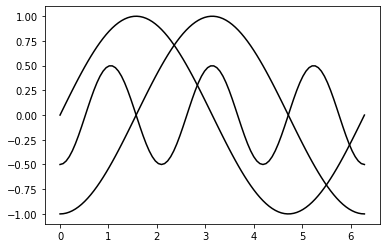

In [3]:
plt.plot(x,y1,c='k')
plt.plot(x,y2,c='k')
plt.plot(x,y3,c='k')
plt.savefig('fig1.png')

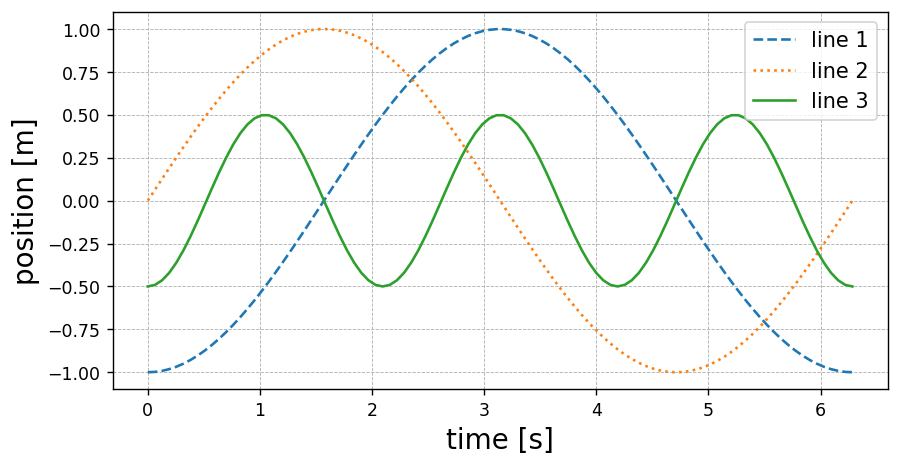

In [4]:
plt.figure(figsize=(8,4),dpi=125)
plt.plot(x,y1,ls='dashed',label='line 1' )
plt.plot(x,y2,ls='dotted',label='line 2' )
plt.plot(x,y3,ls='solid' ,label='line 3' )
plt.grid(ls='dashed',lw=0.5)
plt.legend(loc='upper right',fontsize=12)
plt.ylabel('position [m]',fontsize=16)
plt.xlabel('time [s]',fontsize=16)
plt.savefig('fig2.png')

In [5]:
data = [1.755, 45.35, 0.35, 0.475, 42.24, 0.20, 0.950, 43.98, 0.34, 1.307, 44.99, 0.31, 1.400, 45.28, 0.81, 0.840, 43.67, 0.21, 0.954, 44.30, 0.27, 1.265, 44.64, 0.25, 0.216, 40.33, 0.19, 0.900, 43.64, 0.25, 0.935, 43.97, 0.29, 0.526, 43.08, 0.27, 0.670, 43.19, 0.24, 0.735, 43.14, 0.19, 0.640, 43.01, 0.25, 1.340, 44.92, 0.31, 1.140, 44.71, 0.29, 1.551, 45.07, 0.32, 1.305, 44.51, 0.30, 1.300, 45.06, 0.20, 0.970, 44.67, 0.36, 1.370, 45.23, 0.25, 1.020, 43.99, 0.27, 1.230, 45.17, 0.23, 0.638, 42.89, 0.18, 1.140, 44.44, 0.31, 0.975, 44.21, 0.26, 1.190, 43.64, 0.39, 1.230, 44.97, 0.20, 0.954, 43.85, 0.27, 0.740, 43.38, 0.22, 0.521, 42.05, 0.37, 0.490, 42.54, 0.24, 0.359, 41.23, 0.39, 0.460, 42.23, 0.32, 0.854, 43.96, 0.29, 0.839, 43.45, 0.20, 1.020, 44.52, 0.19, 1.120, 44.67, 0.18, 1.010, 44.77, 0.19, 1.390, 44.90, 0.19 ]
z = data[::3]
mu = data[1::3]
err = data[2::3]

In [6]:
from scipy.integrate import quad


In [7]:
# question 1
h = 0.73 
H0 = h * 3.241e-18 # H0 in inverse seconds
c = 3e10 #cm / s

omega_m = np.array([0.27,0.27,1])
omega_l = np.array([0.73,0.0,0.0])


def integrand(z,omegam,omegal):
    return 1/(np.sqrt(omegam*(1+z)**3 + omegal + (1-omegam-omegal)*(1+z)**2))

def dl(z,omegam,omegal):
    omega = omegam + omegal
    k = (H0**2 / c**2) * (omega - 1) 
    dl = []
    for i in range(len(z)):
        integ = quad(integrand, 0,z[i],args=(omegam,omegal))[0]
        if k < 0:
            dl.append((1+z[i])*abs(k)**(-1/2) * np.sinh(c*abs(k)**(1/2) * integ / H0 ))
        elif k == 0:
            dl.append((1+z[i])*c * integ / H0)
        elif k > 0: 
            dl.append((1+z[i])*abs(k)**(-1/2) * np.sin(c*abs(k)**(1/2) * integ / H0 ))
    return np.array(dl)*(3.24078e-19)

In [8]:
zz = np.linspace(0.0001,2,500)
dL0 = dl(zz,omega_m[0],omega_l[0])
mu0 = 5*np.log10(dL0/10)

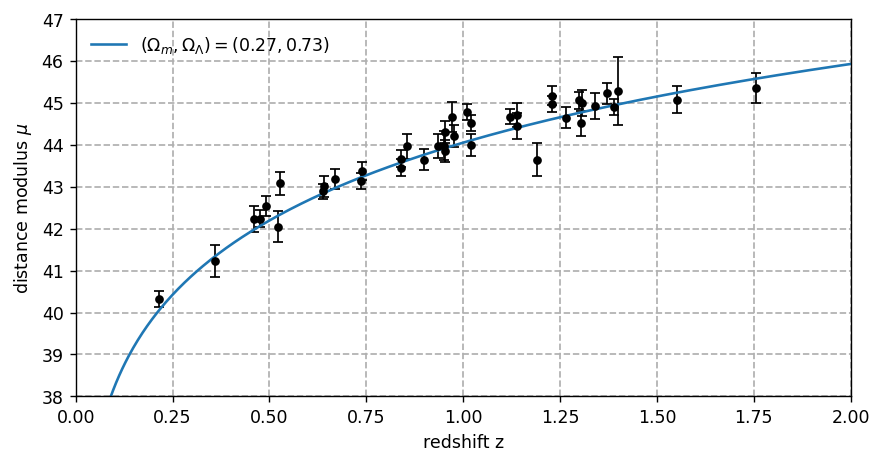

In [9]:
plt.figure(figsize=(8,4),dpi=125)

plt.errorbar(x=z,y=mu,yerr=err,
             ls='none',marker='o',ms=4,
            color='black',ecolor='black',lw=1,
            capsize=3)


# fit
plt.plot(zz,mu0,label='$(\Omega_m, \Omega_\Lambda) = (0.27,0.73)$')
plt.xlim(0,2)
plt.ylim(38,47)
plt.xlabel('redshift z')
plt.ylabel('distance modulus $\\mu$')
plt.legend(frameon=False)
plt.grid(ls='dashed',lw=1)
plt.savefig('fig3.png',bbox_inches='tight')

In [10]:
xx = np.linspace(-4,4,30)
yy = xx**2 + np.random.normal(size=30) 
yy += np.abs(np.min(yy))
err = np.random.normal(size=30)

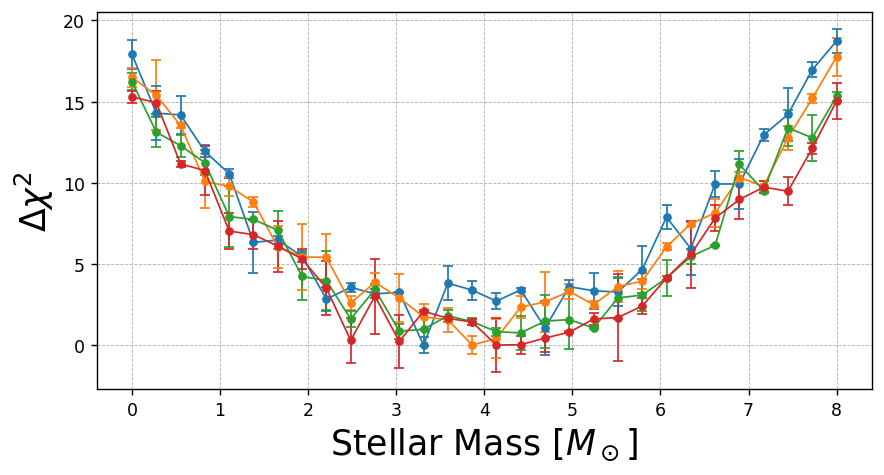

In [11]:
plt.figure(figsize=(8,4),dpi=125)
for i in range(4):
    yy = xx**2 + np.random.normal(scale=1,size=30) 
    yy += np.abs(np.min(yy))
    err = np.random.normal(size=30)
    plt.errorbar(xx+4,yy,yerr=err,
                 ls='solid',marker='o',ms=4,
                lw=1,
                capsize=3)

plt.xlabel('Stellar Mass [$M_\odot$]', fontsize=20)
plt.ylabel('$\\Delta \\chi^2$', fontsize=20)
plt.grid(ls='dashed',lw=0.5)
plt.savefig('fig5.png',bbox_inches='tight')

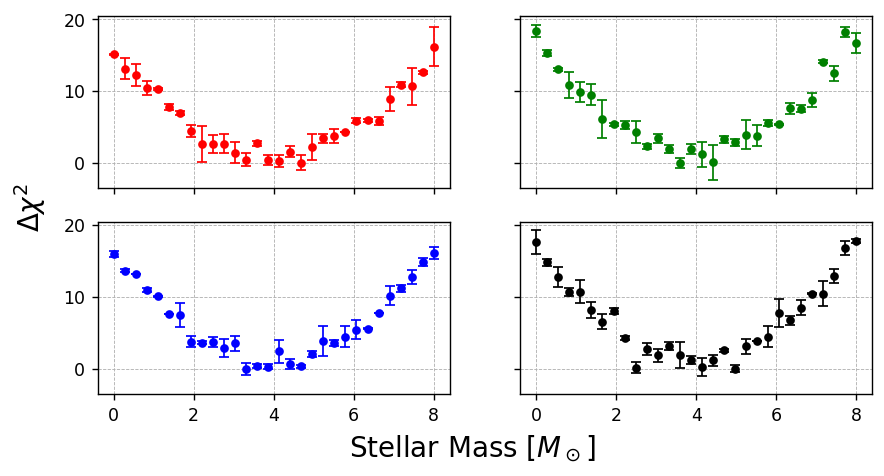

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,4),dpi=125,sharex=True,sharey=True)
co=['red','green','blue','black']
c=0
for i in range(2):
    for j in range(2):
        yy = xx**2 + np.random.normal(scale=1,size=30) 
        yy += np.abs(np.min(yy))
        err = np.random.normal(size=30)
        axes[i,j].errorbar(xx+4,yy,yerr=err,color=co[c],
                 ls='none',marker='o',ms=4,
                lw=1,
                capsize=3)
        axes[i,j].grid(ls='dashed',lw=0.5)
        c+=1



fig.text(0.5, 0.00, 'Stellar Mass [$M_\odot$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, '$\\Delta \\chi^2$', va='center', rotation='vertical',fontsize=16)
plt.savefig('fig5.png',bbox_inches='tight')

In [13]:
dat  = np.random.normal(3,5,size=400)
dat2 = np.random.normal(5,1,size=400)

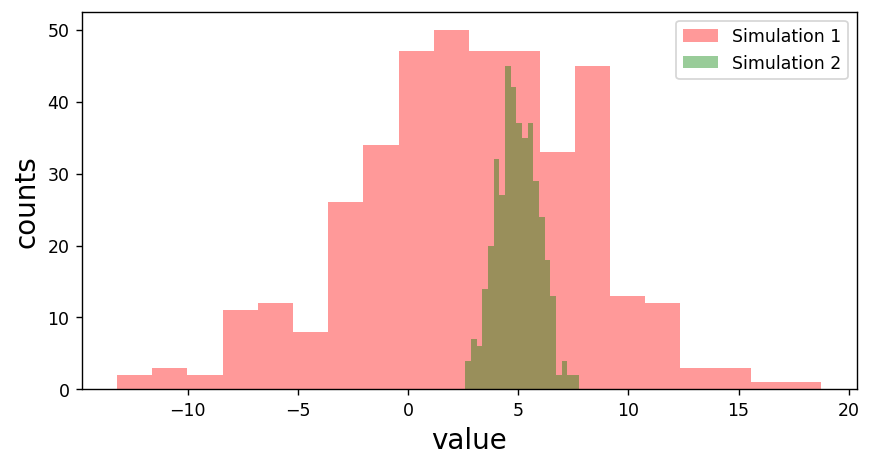

In [14]:
plt.figure(figsize=(8,4),dpi=125)
plt.hist(dat ,bins=20,alpha=0.4,color='red', label='Simulation 1')
plt.hist(dat2,bins=20,alpha=0.4,color='green', label='Simulation 2')
plt.ylabel('counts',fontsize=16)
plt.xlabel('value' ,fontsize=16)
plt.legend()
plt.savefig('fig6.png',dpi=125)

# 